# **Predictive Analytic-Exam Project**


---
**Anggota:** <br>

**Nabil Muhammad Raihan**|**2010512012**
---------------------|--------------
**Fahry Amzar**          |**2010512021**

# **1. Eksplorasi Kolom Dataset**

- import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

pd.options.mode.chained_assignment = None  # default='warn'

!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


- Load data dan menampilkan informasi dataset

In [3]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/data_retail.csv", sep=";")

print('\nInfo dataset:')
df.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


- Menampilkan nama-nama kolom pada dataset

In [4]:
print("\nKolom daataset: ")
df.columns


Kolom daataset: 


Index(['no', 'Row_Num', 'Customer_ID', 'Product', 'First_Transaction',
       'Last_Transaction', 'Average_Transaction_Amount', 'Count_Transaction'],
      dtype='object')

- Menampilkan tipe data setiap kolom pada dataset

In [5]:
print("\nTipe data setiap kolom: ")
df.dtypes


Tipe data setiap kolom: 


no                             int64
Row_Num                        int64
Customer_ID                    int64
Product                       object
First_Transaction              int64
Last_Transaction               int64
Average_Transaction_Amount     int64
Count_Transaction              int64
dtype: object

- Memeriksa keberadaan missing value pada dataset

In [6]:
# cek missing value menggunakan fungsi isnull() dan sum()
df.isnull().sum()

no                            0
Row_Num                       0
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64

# **2. Data Preparation**

- Importing data: Melakukan import data_retail.csv ke python environment.

In [7]:
# load data .csv menggunakan fungsi read_csv()
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/data_retail.csv", sep=";")

- Menampilkan 5 data awal dataset

In [8]:
print("\nMenampilkan 5 data awal: ")
df.head()


Menampilkan 5 data awal: 


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


- Cleansing data: Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut. (rubahlah data First_Transaction dan Last_Transaction menjadi format date_time yang bisa dibaca).

In [9]:
# mengubah tipe data menjadi datetime menggunakan fungsi to_datetime()
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [10]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


# **3. Exploratory Data Analysis (EDA)**

#### Pie Chart: Visualisasi Persentase Produk Terjual

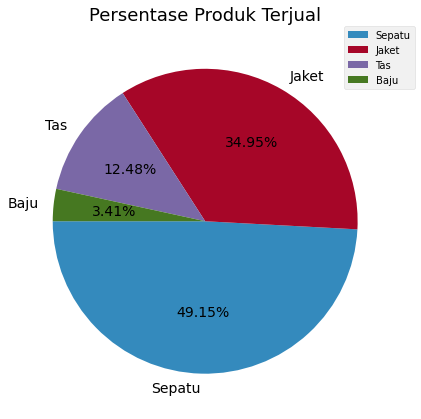

In [11]:
# set style chart dengan tema "bmh"
plt.style.use('bmh')

# set figure size
plt.figure(figsize=(6,6))

# set label plot
label=['Sepatu','Jaket','Tas','Baju']

# menampilkan pie chart menggunakan fungsi pie
plt.pie(df['Product'].value_counts(), 
        labels=label, 
        autopct='%1.2f%%', 
        startangle=180,
        textprops={'fontsize': 14})

# set title pie chart
plt.title('Persentase Produk Terjual', loc='center', pad=10, fontsize=18)

# set legenda pie chart
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.tight_layout()
plt.show()

##### **Summary**
- Sepatu merupakan produk dengan penjualan terbanyak dengan persentase sebesar 49.15% dari keseluruhan penjualan.
- Baju merupakan produk dengan penjualan terendah dengan persentase sebesar 3.41% dari keseluruhan penjualan.
- Urutan penjualan produk dari yang terbanyak ke terendah: <br>
  1. Sepatu
  2. Jaket
  3. Tas
  4. Baju

#### Bar Chart: Visualisasi Jumlah Produk Terjual

Text(0.5, 1.0, 'Bar Chart Jumlah Produk Terjual')

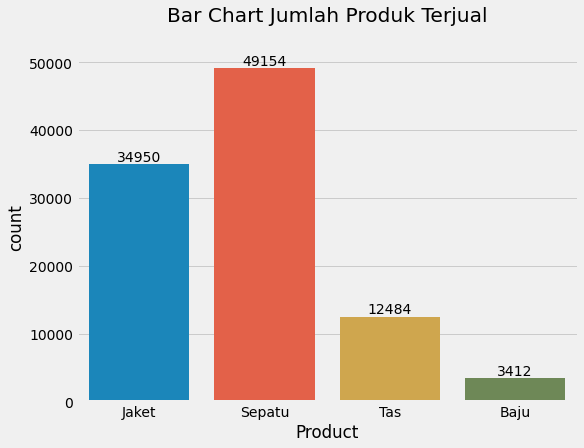

In [12]:
# set style chart dengan tema "fivethirtyeight"
plt.style.use('fivethirtyeight')

# set figure size
plt.figure(figsize=(8,6))

# menampilkan countplot menggunakan fungsi countplot
ax = sns.countplot(data=df, x="Product")
ax.bar_label(ax.containers[0])

# set title countplot
plt.title("Bar Chart Jumlah Produk Terjual", pad=30)

##### **Summary**
- Produk paling banyak terjual adalah **sepatu** dengan jumlah 49154.
- Produk paling sedikit terjual adalah **baju** dengan jumlah 3412.

#### Bar Chart: Visualisasi Jumlah Tahun Pertama Transaksi Per Tahun

Text(0.5, 1.0, 'Bar Plot Jumlah Tahun Pertama Transaksi Per Tahun')

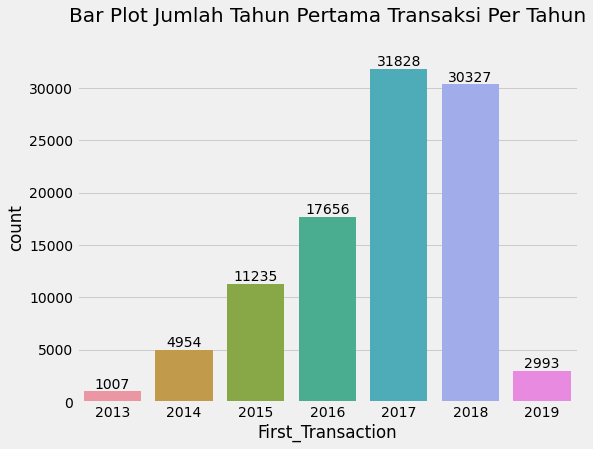

In [13]:
# set figure size
plt.figure(figsize=(8,6))

# menampilkan countplot menggunakan fungsi countplot
ax = sns.countplot(data=df, x=df['First_Transaction'].dt.year)
ax.bar_label(ax.containers[0])

# set title countplot
plt.title("Bar Plot Jumlah Tahun Pertama Transaksi Per Tahun", pad=30)

##### **Summary**
 - Periode tahun 2013 - 2017 mengalami peningkatan jumlah First_Transaction.
 - Periode tahun 2017 - 2019 mengalami penurunan jumlah First_Transaction.
 - Jumlah First_Transaction terbanyak terdapat pada tahun 2017 dengan jumlah sebanyak 31.828.
 - Jumlah First_Transaction tersedikit terdapat pada tahun 2013 dengan jumlah sebanyak 1.007.

#### Heatmap Chart: Visualisasi Nilai Korelasi Antara Kolom Average_Transaction_Amount dan Count_Transaction

Text(0.5, 1.0, 'Nilai Korelasi Antara Kolom Average_Transaction_Amount\n dan Count_Transaction')

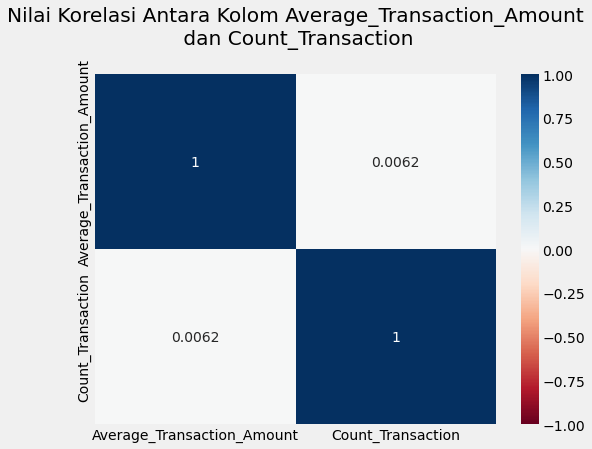

In [14]:
# set figure size
plt.figure(figsize=(8,6))

df_heatmap = df.drop(['no', 'Row_Num', 'Customer_ID'], axis=1)

# menampilkan nilai korelasi antara kolom menggunakan fungsi heatmap
sns.heatmap(df_heatmap.corr(), cmap="RdBu", annot=True, vmin=-1, vmax=1)

# set title heatmap
plt.title("Nilai Korelasi Antara Kolom Average_Transaction_Amount\n dan Count_Transaction", pad=30)

##### **Summary**
- Nilai korelasi antara kolom Average_Transaction_Amount dan Count_Transaction bernilai 0.0062 yang bermakna bahwa kedua kolom tersebut sedikit berkorelasi positif karena mendekati angka 1.

# **4. Data Pre-processing**

- Menambahkan kolom "is_Churn" yang yang berfungsi sebagai kolom target dengan nilai **True** atau **False** berdasarkan kriteria yang telah ditentukan

In [15]:
# Pengecekan transaksaksi terakhir dalam dataset
print("Tanggal transaksi terakhir dalam dataset: ")
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus Churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'Churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'Churn'] = False

print('\nLima data teratas:')
df

Tanggal transaksi terakhir dalam dataset: 
2019-02-01 23:57:57.286000128

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False
...,...,...,...,...,...,...,...,...,...
99995,99996,99996,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True
99996,99997,99997,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True
99997,99998,99998,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True
99998,99999,99999,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True


- Menghapus kolom yang tidak diperlukan, yaitu **no**, **Row_num**, dan **Customer_ID**.

In [16]:
df = df.drop(['no','Row_Num','Customer_ID'], axis=1)
df

,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn
0,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False
...,...,...,...,...,...,...
99995,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True
99996,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True
99997,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True
99998,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True


- Menambahkan kolom perbedaan tahun pertama dan terakhir transaksi

In [17]:
df['Year_Difference'] = df['Last_Transaction'].dt.year - df['First_Transaction'].dt.year
df

,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn,Year_Difference
0,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2
1,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,4
2,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2
3,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2
4,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,3
...,...,...,...,...,...,...,...
99995,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True,0
99996,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True,0
99997,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True,0
99998,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True,0


#### **Penentuan Kolom Feature dan Target**

In [18]:
# kolom feature
feature_columns = ['Product',
                   'Average_Transaction_Amount',
                   'Count_Transaction',
                   'Year_Difference']
X = df[feature_columns] 

# kolom target
y = df['Churn'] 

print(X)
print(y)

      Product  Average_Transaction_Amount  Count_Transaction  Year_Difference
0       Jaket                     1467681                 22                2
1      Sepatu                     1269337                 41                4
2         Tas                      310915                 30                2
3       Jaket                      722632                 27                2
4      Sepatu                     1775036                 25                3
...       ...                         ...                ...              ...
99995   Jaket                      298662                  1                0
99996  Sepatu                      349556                  1                0
99997   Jaket                      598013                  1                0
99998  Sepatu                     1208591                  1                0
99999   Jaket                      486710                  1                0

[100000 rows x 4 columns]
0        False
1        False
2      

#### **Encoding Data**

In [19]:
le = LabelEncoder()

X['Product'] = le.fit_transform(X['Product'])
y = le.fit_transform(y)

#### **Normalisasi Data**

In [20]:
X["Product"] = X["Product"] / X["Product"].max()
X["Average_Transaction_Amount"] = X["Average_Transaction_Amount"] / X["Average_Transaction_Amount"].max()
X["Count_Transaction"] = X["Count_Transaction"] / X["Count_Transaction"].max()
X["Year_Difference"] = X["Year_Difference"] / X["Year_Difference"].max()

print(X)

        Product  Average_Transaction_Amount  Count_Transaction  \
0      0.333333                    0.030069           0.005711   
1      0.666667                    0.026006           0.010644   
2      1.000000                    0.006370           0.007788   
3      0.333333                    0.014805           0.007009   
4      0.666667                    0.036366           0.006490   
...         ...                         ...                ...   
99995  0.333333                    0.006119           0.000260   
99996  0.666667                    0.007162           0.000260   
99997  0.333333                    0.012252           0.000260   
99998  0.666667                    0.024761           0.000260   
99999  0.333333                    0.009971           0.000260   

       Year_Difference  
0             0.333333  
1             0.666667  
2             0.333333  
3             0.333333  
4             0.500000  
...                ...  
99995         0.000000  
99996  

#### **Nilai Korelasi Antara Kolom Setelah Preprocessing**

Text(0.5, 1.0, 'Nilai Korelasi Antara Kolom Setelah Preprocessing')

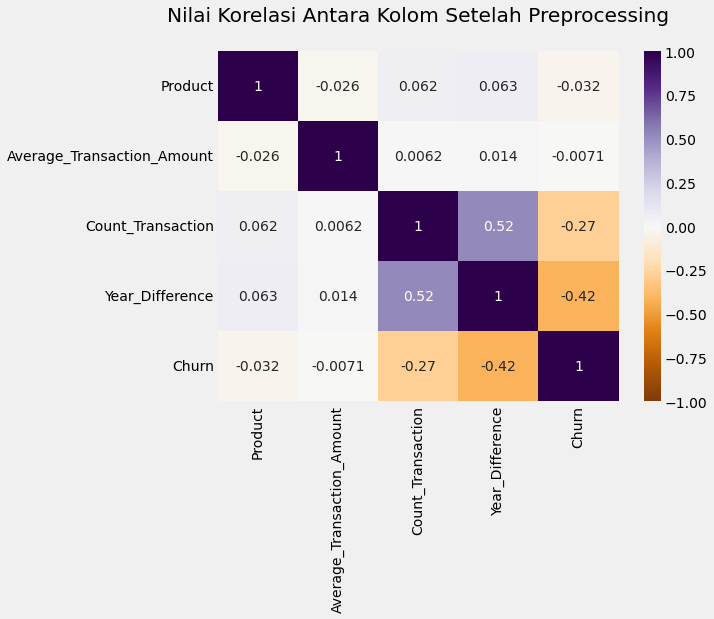

In [21]:
df_after_preprocessing = X.copy()
df_after_preprocessing["Churn"] = y.copy()

# set figure size
plt.figure(figsize=(8,6))

# menampilkan nilai korelasi antara kolom menggunakan fungsi heatmap
sns.heatmap(df_after_preprocessing.corr(), cmap="PuOr", annot=True, vmin=-1, vmax=1)

# set title heatmap
plt.title("Nilai Korelasi Antara Kolom Setelah Preprocessing", pad=30)

#### **Pembagian Data Menjadi Data Training dan Data Testing**

- Pembagian data menggunakan fungsi `train_test_split` dengan proporsi data training sebesar 70% dan data testing sebesar 30% yang diacak sebanyak 42 kali

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(
  "Jumlah baris dan kolom variabel X_train: ",
  X_train.shape,
  "\nJumlah baris dan kolom variabel X_test : ",
  X_test.shape,
  "\nJumlah baris dan kolom variabel y_train: ",
  y_train.shape,
  "\nJumlah baris dan kolom variabel y_test : ",
  y_test.shape
)

Jumlah baris dan kolom variabel X_train:  (70000, 4) 
Jumlah baris dan kolom variabel X_test :  (30000, 4) 
Jumlah baris dan kolom variabel y_train:  (70000,) 
Jumlah baris dan kolom variabel y_test :  (30000,)


# **5. Eksplorasi Model Machine Learning**

#### **Training Model Machine Learning**

##### Model Decision Tree Classifier

In [23]:
dtc_model = DecisionTreeClassifier()
dtc_model = dtc_model.fit(X_train, y_train)
dtc_model

DecisionTreeClassifier()

##### Model Naive Bayes

In [24]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
nb_model

GaussianNB()

#### **Prediksi Model Machine Learning**

##### Model Decision Tree Classifier

In [25]:
y_pred_dtc_model = dtc_model.predict(X_test)

##### Model Naive Bayes

In [26]:
y_pred_nb_model = nb_model.predict(X_test)

#### **Evaluasi Model Machine Learning**

##### Model Decision Tree Classifier

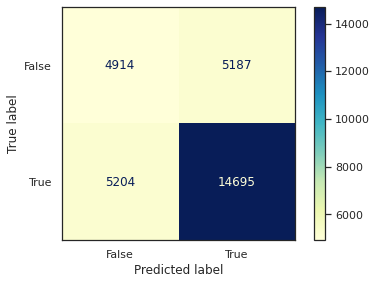

In [27]:
sns.set_theme(style="white")

cm = confusion_matrix(y_test,y_pred_dtc_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap='YlGnBu')

plt.show()

In [28]:
print('Accuracy :', accuracy_score(y_test, y_pred_dtc_model))
print('Precision:', precision_score(y_test, y_pred_dtc_model))
print('Recall   :', recall_score(y_test, y_pred_dtc_model))
print(classification_report(y_test, y_pred_dtc_model, target_names=["False","True"]))

Accuracy : 0.6536333333333333
Precision: 0.7391107534453274
Recall   : 0.7384793205688728
              precision    recall  f1-score   support

       False       0.49      0.49      0.49     10101
        True       0.74      0.74      0.74     19899

    accuracy                           0.65     30000
   macro avg       0.61      0.61      0.61     30000
weighted avg       0.65      0.65      0.65     30000



###### Summary Model Decision Tree Classifier
- Tingkat akurasi: 65%.
- Tingkat presisi: 73%
- Tingkat recall : 73%

##### Model Naive Bayes

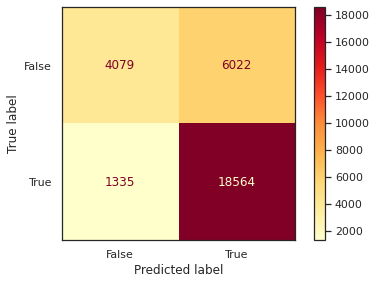

In [29]:
sns.set_theme(style="white")

cm = confusion_matrix(y_test,y_pred_nb_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap='YlOrRd')

plt.show()

In [30]:
print('Accuracy :', accuracy_score(y_test, y_pred_nb_model))
print('Precision:', precision_score(y_test, y_pred_nb_model))
print('Recall   :', recall_score(y_test, y_pred_nb_model))
print(classification_report(y_test, y_pred_nb_model, target_names=["False","True"]))

Accuracy : 0.7547666666666667
Precision: 0.7550638574798666
Recall   : 0.932911201567918
              precision    recall  f1-score   support

       False       0.75      0.40      0.53     10101
        True       0.76      0.93      0.83     19899

    accuracy                           0.75     30000
   macro avg       0.75      0.67      0.68     30000
weighted avg       0.75      0.75      0.73     30000



###### Summary Model Naive Bayes
- Tingkat akurasi: 75%.
- Tingkat presisi: 75%
- Tingkat recall : 93%

# **Kesimpulan**
- Sepatu merupakan produk dengan penjualan terbanyak dengan persentase sebesar 49.15% dari keseluruhan penjualan dengan jumlah sebanyak 49.154.
- Baju merupakan produk dengan penjualan terendah dengan persentase sebesar 3.41% dari keseluruhan penjualan dengan jumlah sebanyak 3.412.
- Penurunan jumlah First_Transaction terjadi mulai tahun 2018.
- Kolom Average_Transaction_Amount dan Count_Transaction sedikit berkorelasi positif dengan nilai korelasi yaitu 0.0062
- Berdasarkan hasil evaluasi pemodelan klasifikasi dengan Decision Tree dan Naive bayes dapat diketahui bahwa pemodelan terbaik adalah pemodelan dengan Naive Bayes. Hal tersebut dapat diketahui berdasarkan nilai akurasi dari model naive bayes yang lebih tinggi, yaitu 75%.